<a href="https://colab.research.google.com/github/Shivam-Verma1/Sampling/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


df = pd.read_csv('/content/sample_data/Creditcard_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

# Credit Card Distribution

In [5]:
def class_distribution(y): #Simply counting the number of samples in each class
    counts = y.value_counts()
    distribution = counts/len(y)
    return distribution

def plot_class_distribution(y): #Bar chart to visualize the distribution of classes
    plt.figure(figsize=(8,6))
    perct = y.value_counts(normalize = True)*100

    sns.barplot(x = perct.index, y = perct.values)
    plt.title('Class Distr. (percentage)')
    plt.ylabel('Percentage')
    plt.xlabel('Class')
    plt.show()

def imbalance_ratio(y): #Finding the imbalance ratio
    counts = y.value_counts()
    ratio = counts.max()/counts.min()
    return ratio

def gini_coefficient(y):#Finds the gini coefficient, a measure of statistical dispersion
    counts = y.value_counts()
    p = counts/len(y)
    gini = 1-sum(p**2)
    return gini

In [6]:
y = df['Class']
print(y)

0      0
1      1
2      0
3      0
4      0
      ..
767    0
768    0
769    0
770    0
771    0
Name: Class, Length: 772, dtype: int64


In [7]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

In [8]:
class_dist = class_distribution(y)
print("Class Distribution: ")
print(class_dist)

Class Distribution: 
0    0.988342
1    0.011658
Name: Class, dtype: float64


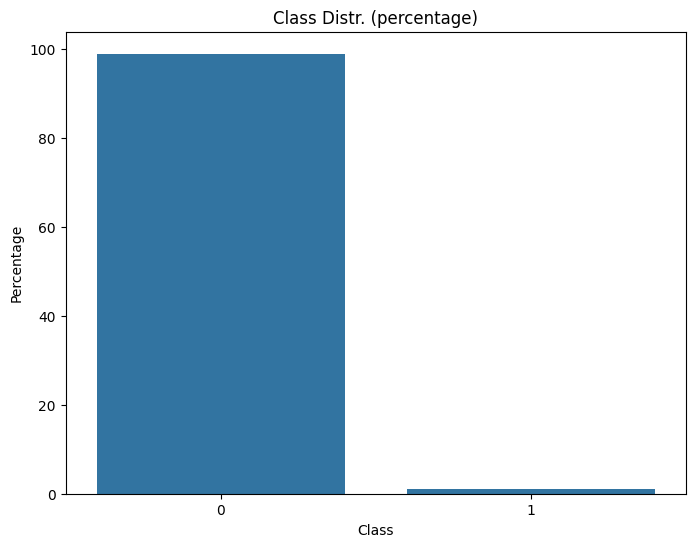

In [9]:

plot_class_distribution(y)

In [10]:
imbal_ratio = imbalance_ratio(y)
print(f"Imbalance Ratio: {imbal_ratio}")

gini_coeff = gini_coefficient(y)
print(f'Gini Coefficient: {gini_coeff}')

Imbalance Ratio: 84.77777777777777
Gini Coefficient: 0.02304424279846451


### Inference:
Clearly the data is too much imbalanced and we wont be able to train a model properly on this
Following cells we will implement our sampling techniques

## Balancing the Highly Imbalanced Dataset

In [11]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

In [12]:
%%capture
!pip install catboost

In [13]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Apply Random OverSampling for Balancing
and then again combined the data to apply various sampling techniques

In [14]:
X = df.drop(columns = 'Class')
y = df['Class']

X_resampled, y_resampled = RandomOverSampler().fit_resample(X,y)
# print(y_resampled.value_counts())
# print(X_resampled)


df=pd.concat([X_resampled, y_resampled],axis=1)
df
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
1522,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1523,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1524,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1


In [15]:
import math

In [22]:
models = {
   'CatBoost': CatBoostClassifier(random_state=42, verbose=False),
    'XGBoost': XGBClassifier(random_state=42, verbosity=0),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

# balancers = {
#     'RandomOverSampler': RandomOverSampler(sampling_strategy='auto', random_state=42),
#
#     'RandomUnderSampler': RandomUnderSampler(sampling_strategy='auto', random_state=42),
#     'NearMiss': NearMiss(sampling_strategy='auto', version=1),
#     'TomekLinks': TomekLinks(sampling_strategy='auto')
# }

def SimpleRandomSampling(data):
  sample_size=384
  randomsample=data.sample(n=sample_size,random_state=42)
  return randomsample


def Systematic_Sampling(data):
  n = len(df)
  # Set the sampling interval "k" as the square root of the number of rows in the dataset
  k = int(math.sqrt(n))
  # Select every "k" row starting from a random index in the dataset
  sample = df.iloc[::k]
  return sample


# BootStrap Sampling is simply sampling with replacement
def BootStrap_Sampling(data):
  sample_size=50
  randomsample=data.sample(n=sample_size,random_state=42,replace=True)
  return randomsample


def Stratified_Sampling(data):
  # Make 2 Subgroups
  random_size=70
  # 2 Subgroups defined on the baisis of Class Column and the randomly selected equal sized portions from both the subgroups
  Class1=data[data['Class']==1]     #Group 1
  Class0=data[data['Class']==0]     #Group 0
  random1=Class1.sample(n=random_size)
  random0=Class0.sample(n=random_size)

  sample=pd.concat([random1,random0],axis=0)
  return sample


def Cluster_Sampling(data):
  pass


# All Sampling Techniques

samplers = {
    'Simple Random': SimpleRandomSampling,
    'Systematic Sampling': Systematic_Sampling,
    'BootStrap Sampling':BootStrap_Sampling,
    'Stratified_Sampling':Stratified_Sampling,
    # 'SMOTE': SMOTE(sampling_strategy='auto', random_state=42),
}

In [23]:

%%capture

results_table = pd.DataFrame(columns = ['Model', 'Sampler', 'Accuracy'])

for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():


        # X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        # Apply various Sampling techniques to create samples from the data
        # if(sampler_name=='SMOTE')
        data=sampler(df)

        X = data.drop(columns = 'Class')
        y = data['Class']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_table = results_table.append({
            'Model':model_name,
            'Sampler':sampler_name,
            'Accuracy':accuracy,
        }, ignore_index = True)

In [24]:
print(results_table)

           Model              Sampler  Accuracy
0       CatBoost        Simple Random  0.987013
1       CatBoost  Systematic Sampling  1.000000
2       CatBoost   BootStrap Sampling  0.900000
3       CatBoost  Stratified_Sampling  1.000000
4        XGBoost        Simple Random  0.974026
5        XGBoost  Systematic Sampling  0.875000
6        XGBoost   BootStrap Sampling  0.900000
7        XGBoost  Stratified_Sampling  0.964286
8       LightGBM        Simple Random  0.974026
9       LightGBM  Systematic Sampling  0.375000
10      LightGBM   BootStrap Sampling  0.800000
11      LightGBM  Stratified_Sampling  0.928571
12           SVC        Simple Random  0.675325
13           SVC  Systematic Sampling  0.375000
14           SVC   BootStrap Sampling  0.600000
15           SVC  Stratified_Sampling  0.607143
16  RandomForest        Simple Random  1.000000
17  RandomForest  Systematic Sampling  1.000000
18  RandomForest   BootStrap Sampling  0.900000
19  RandomForest  Stratified_Sampling  0